<a href="https://colab.research.google.com/github/huysn910hn/Fine-tuning-PhoBERT-sentiment-classfication-with-tensorflow/blob/main/btl_mod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [ ]:
!pip install py_vncorenlp

  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.6/1.6 MB 24.2 MB/s eta 0:00:00
  Created wheel for py_vncorenlp: filename=py_vncorenlp-0.1.4-py3-none-any.whl size=4304 sha256=fb9647db5e1990c8f42fe96ce614e6f4a1c43476e300b9e91ab33f0cdd454033
  Stored in directory: /root/.cache/pip/wheels/6d/2d/d6/158260bfd6820d144535857b80cc112bee5c3aa6d81b6dc049
Successfully built py_vncorenlp


In [ ]:
import py_vncorenlp
py_vncorenlp.download_model(save_dir='/content/drive/MyDrive/Colab_Notebooks/deep_learning/vncorenlp')

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModel
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_score, recall_score, f1_score
from transformers import TFAutoModel
from keras.saving import register_keras_serializable
tokenizer = AutoTokenizer.from_pretrained('vinai/phobert-base')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

In [ ]:
df = pd.read_csv('data.csv')
df.head()
df.info()
print(df.columns)
df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16188 entries, 0 to 16187
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  16188 non-null  object
 1   label    16188 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 253.1+ KB
Index(['comment', 'label'], dtype='object')


label
2    8042
0    7447
1     699
Name: count, dtype: int64

In [ ]:
df.head(10)

comment  label
0                          slide gi√°o tr√¨nh ƒë·∫ßy ƒë·ªß .      2
1            B·∫°n b√® em fan jack n√™n em gh√©t tr∆∞·ªùng üëå      0
2                tr∆∞·ªùng kh√¥ng ph√°t ng∆∞·ªùi y√™u g√¨ c·∫£ .      0
3  Tr∆∞·ªùng t·ªët kh√¥ng ch·ªâ c∆° s·ªü v·∫≠t ch·∫•t, ƒë·ªôi ng≈© g...      2
4  Tr∆∞·ªùng h·ªçc r·ªông r√£i tho√°ng m√°t, sinh vi√™n th√¨ ...      2
5                                 Em gh√©t tr∆∞·ªùng üò° .      0
6             tr∆∞·ªùng h·ªçc nh∆∞ ng√¥i nh√† th·ª© 2 c·ªßa em üòç      2
7  ƒêi·ªÅu ho√† h·ªèng, th√≠ch h·ª£p ƒë·ªÉ v·ªÅ ch·ª© h·ªçc c√°i g√¨ ü§£ .      0
8                 CH·∫†Y NGAY ƒêI, do d·ª± ti·ªÅn ƒë√¨nh m·∫•t       0
9                  Tr∆∞·ªùng h·ªçc kh√¥ng c√≥ g√¨ ƒë·∫∑c bi·ªát.       1

In [ ]:
import seaborn as sns
sns.countplot(x='label', data=df)

<Axes: xlabel='label', ylabel='count'>

In [ ]:
df = df[df['label'] != 1]
df.loc[df['label'] == 2, 'label'] = 1
df.to_csv('data.csv', index = False)
sns.countplot(x='label', data=df)

<Axes: xlabel='label', ylabel='count'>

In [ ]:
import re
import py_vncorenlp

letters = set('a√°√†·∫£√£·∫°ƒÉ·∫Ø·∫±·∫≥·∫µ·∫∑√¢·∫•·∫ß·∫©·∫´·∫≠bcdƒëe√©√®·∫ª·∫Ω·∫π√™·∫ø·ªÅ·ªÉ·ªÖ·ªáfghi√≠√¨·ªâƒ©·ªãjklmno√≥√≤·ªè√µ·ªç√¥·ªë·ªì·ªï·ªó·ªô∆°·ªõ·ªù·ªü·ª°·ª£pqrstu√∫√π·ªß≈©·ª•∆∞·ª©·ª´·ª≠·ªØ·ª±vwxy√Ω·ª≥·ª∑·ªπ·ªµz0123456789. ')

def preprocess_text(text):
    cleaned_text = ''.join(letter.lower() for letter in text if letter.lower() in letters)
    cleaned_text = re.sub(r"\s+", " ", cleaned_text).strip()
    return cleaned_text

def preprocess_csv(file_path, text_column="comment", output_file="processed_data.csv"):
    df = pd.read_csv(file_path)
    df = df.dropna(subset=[text_column])
    df = df[df[text_column].str.strip() != '']
    df = df.reset_index(drop=True)
    df[text_column] = df[text_column].astype(str).apply(preprocess_text)
    df.to_csv(output_file, index=False, encoding='utf-8')
    return df

df = preprocess_csv("data.csv", text_column="comment")

rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='/content/drive/MyDrive/Colab_Notebooks/deep_learning/vncorenlp')
df['comment'] = df['comment'].astype(str).apply(rdrsegmenter.word_segment)
df.to_csv('/content/drive/MyDrive/Colab_Notebooks/deep_learning/data_new.csv', index=False)
print(df["comment"].head())

                                             comment
0                        [slide gi√°o_tr√¨nh ƒë·∫ßy_ƒë·ªß .]
1            [b·∫°n_b√® em fan jack n√™n em gh√©t_tr∆∞·ªùng]
2              [tr∆∞·ªùng kh√¥ng ph√°t ng∆∞·ªùi_y√™u g√¨ c·∫£ .]
3  [tr∆∞·ªùng t·ªët kh√¥ng_ch·ªâ c∆°_s·ªü v·∫≠t_ch·∫•t ƒë·ªôi_ng≈© g...
4  [tr∆∞·ªùng_h·ªçc r·ªông_r√£i tho√°ng m√°t sinh_vi√™n th√¨ ...


In [ ]:
df.head(10)

comment  label
0                        [slide gi√°o_tr√¨nh ƒë·∫ßy_ƒë·ªß .]      1
1            [b·∫°n_b√® em fan jack n√™n em gh√©t_tr∆∞·ªùng]      0
2              [tr∆∞·ªùng kh√¥ng ph√°t ng∆∞·ªùi_y√™u g√¨ c·∫£ .]      0
3  [tr∆∞·ªùng t·ªët kh√¥ng_ch·ªâ c∆°_s·ªü v·∫≠t_ch·∫•t ƒë·ªôi_ng≈© g...      1
4  [tr∆∞·ªùng_h·ªçc r·ªông_r√£i tho√°ng m√°t sinh_vi√™n th√¨ ...      1
5                                 [em gh√©t tr∆∞·ªùng .]      0
6             [tr∆∞·ªùng_h·ªçc nh∆∞ ng√¥i nh√† th·ª© 2 c·ªßa em]      1
7   [ƒëi·ªÅu_ho√† h·ªèng th√≠ch_h·ª£p ƒë·ªÉ v·ªÅ ch·ª© h·ªçc c√°i g√¨ .]      0
8                 [ch·∫°y ngay ƒëi do_d·ª± ti·ªÅn_ƒë√¨nh m·∫•t]      0
9                                    [ch·∫°y ƒëi em ∆°i]      0

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/deep_learning/data_new.csv')
df.head()

comment  label
0                      ['slide gi√°o_tr√¨nh ƒë·∫ßy_ƒë·ªß .']      1
1          ['b·∫°n_b√® em fan jack n√™n em gh√©t_tr∆∞·ªùng']      0
2            ['tr∆∞·ªùng kh√¥ng ph√°t ng∆∞·ªùi_y√™u g√¨ c·∫£ .']      0
3  ['tr∆∞·ªùng t·ªët kh√¥ng_ch·ªâ c∆°_s·ªü v·∫≠t_ch·∫•t ƒë·ªôi_ng≈© ...      1
4  ['tr∆∞·ªùng_h·ªçc r·ªông_r√£i tho√°ng m√°t sinh_vi√™n th√¨...      1

In [ ]:
import re
df['comment'] = df['comment'].astype(str).apply(lambda x: re.sub(r"^\[\s*'(.*)'\s*\]$", r"\1", x))

In [ ]:
def generate_training_data(df, ids, masks, tokenizer):
    for i, comment in enumerate(df['comment']):
        tokenizer_comment = tokenizer.encode_plus(
            comment,
            max_length=256,
            truncation=True,
            padding='max_length',
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenizer_comment['input_ids']
        masks[i, :] = tokenizer_comment['attention_mask']
    return ids, masks

In [ ]:
def SentimentDatasetMapFunction(input_ids, attention_mask, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask
    }, labels

In [ ]:
train_size = int(0.8 * len(df))
train_data = df[:train_size]
temp_data = df[train_size:]
temp_size = int(0.5 * len(temp_data))
val_data = temp_data[:temp_size]
test_data = temp_data[temp_size:]

print(f"Train size: {len(train_data)}")
print(f"Validation size: {len(val_data)}")
print(f"Test size: {len(test_data)}")

Train size: 12391
Validation size: 1549
Test size: 1549


In [ ]:
max_length = 256
num_labels = 2
X_train_ids = np.zeros((len(train_data), max_length), dtype=np.int32)
X_train_masks = np.zeros((len(train_data), max_length), dtype=np.int32)
X_train_ids, X_train_masks = generate_training_data(train_data, X_train_ids, X_train_masks, tokenizer)
y_train = np.array(train_data['label'])
y_train_encoded = np.zeros((len(y_train), num_labels), dtype = np.int32)
y_train_encoded[np.arange(len(y_train)), y_train] = 1

X_val_ids = np.zeros((len(val_data), max_length), dtype=np.int32)
X_val_masks = np.zeros((len(val_data), max_length), dtype=np.int32)
X_val_ids, X_val_masks = generate_training_data(val_data, X_val_ids, X_val_masks, tokenizer)
y_val = np.array(val_data['label'])
y_val_encoded = np.zeros((len(y_val), num_labels), dtype = np.int32)
y_val_encoded[np.arange(len(y_val)), y_val] = 1

X_test_ids = np.zeros((len(test_data), max_length), dtype=np.int32)
X_test_masks = np.zeros((len(test_data), max_length), dtype=np.int32)
X_test_ids, X_test_masks = generate_training_data(test_data, X_test_ids, X_test_masks, tokenizer)
y_test = np.array(test_data['label'])
y_test_encoded = np.zeros((len(y_test), num_labels), dtype = np.int32)
y_test_encoded[np.arange(len(y_test)), y_test] = 1

In [ ]:
print(X_train_ids[1])
print(y_train_encoded[1])

[    0  1135   193  1818 27993    77   193  4908  4827  1187 16945     2
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1   

In [ ]:
text = tokenizer.decode(X_train_ids[1], skip_special_tokens= True)
print(text)

b·∫°n_b√® em fan jack n√™n em gh√©t_tr∆∞·ªùng


In [ ]:
train_data = tf.data.Dataset.from_tensor_slices(SentimentDatasetMapFunction(X_train_ids, X_train_masks, y_train_encoded))
val_data = tf.data.Dataset.from_tensor_slices(SentimentDatasetMapFunction(X_val_ids, X_val_masks, y_val_encoded))
test_data = tf.data.Dataset.from_tensor_slices(SentimentDatasetMapFunction(X_test_ids, X_test_masks, y_test_encoded))

In [ ]:
print(train_data)
print(val_data)
print(test_data)

<_TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(256,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(256,), dtype=tf.int32, name=None)}, TensorSpec(shape=(2,), dtype=tf.int32, name=None))>
<_TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(256,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(256,), dtype=tf.int32, name=None)}, TensorSpec(shape=(2,), dtype=tf.int32, name=None))>
<_TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(256,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(256,), dtype=tf.int32, name=None)}, TensorSpec(shape=(2,), dtype=tf.int32, name=None))>


In [ ]:
batch_size = 64
train_data = train_data.batch(batch_size)
val_data = val_data.batch(batch_size)
test_data = test_data.batch(batch_size)

In [ ]:
@register_keras_serializable(package="CustomLayers")
class PhoBERT(tf.keras.layers.Layer):
    def __init__(self, model_name="vinai/phobert-base", **kwargs):
        super(PhoBERT, self).__init__(**kwargs)
        self.bert = TFAutoModel.from_pretrained(model_name)
        self.bert.trainable = False

    def call(self, inputs):
        input_ids, attention_mask = inputs
        input_ids = tf.cast(input_ids, tf.int32)
        attention_mask = tf.cast(attention_mask, tf.int32)
        output = self.bert(input_ids=input_ids, attention_mask=attention_mask)[0]
        return output[:, 0, :]

    def get_config(self):
        config = super().get_config()
        config.update({"model_name": "vinai/phobert-base"})
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [ ]:
input_ids = Input(shape=(256,), dtype=tf.int32, name="input_ids")
attention_mask = Input(shape=(256,), dtype=tf.int32, name="attention_mask")

bert_output = PhoBERT()([input_ids, attention_mask])

x = Dense(256, activation="relu")(bert_output)
x = Dropout(0.1)(x)
output = Dense(2, activation="softmax")(x)

model = Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at vinai/phobert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "functional_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_ids           ‚îÇ (None, 256)       ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ attention_mask      ‚îÇ (None, 256)       ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ pho_bert_1          ‚îÇ (None, 768)       ‚îÇ          0 ‚îÇ input_ids[0][0],  ‚îÇ
‚îÇ (PhoBERT)           ‚îÇ                   ‚îÇ            ‚îÇ attention_mask[0‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)     ‚îÇ (None, 256)       ‚îÇ    196,864 ‚îÇ pho_bert_1[0][0]  ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout) ‚îÇ (None, 256)       ‚îÇ          0 ‚îÇ dense_2[0][0]     ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)     ‚îÇ (None, 2)         ‚îÇ        514 ‚îÇ dropout_1[0][0]   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 197,378 (771.01 KB)

 Trainable params: 197,378 (771.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 15
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    batch_size=batch_size
)

Epoch 1/15
194/194 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 207s 965ms/step - accuracy: 0.6860 - loss: 0.6043 - val_accuracy: 0.8864 - val_loss: 0.3891
Epoch 2/15
194/194 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 181s 894ms/step - accuracy: 0.8805 - loss: 0.3666 - val_accuracy: 0.9019 - val_loss: 0.2942
Epoch 3/15
194/194 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 202s 894ms/step - accuracy: 0.9017 - loss: 0.2868 - val_accuracy: 0.9103 - val_loss: 0.2523
Epoch 4/15
194/194 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 200s 887ms/step - accuracy: 0.9118 - loss: 0.2475 - val_accuracy: 0.9199 - val_loss: 0.2275
Epoch 5/15
194/194 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 202s 886ms/step - accuracy: 0.9209 - loss: 0.2230 - val_accuracy: 0.9277 - val_loss: 0.2107
Epoch 6/15
194/194 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 172s 887ms/step - accuracy: 0.9269 - loss: 0.2067 - val_accu

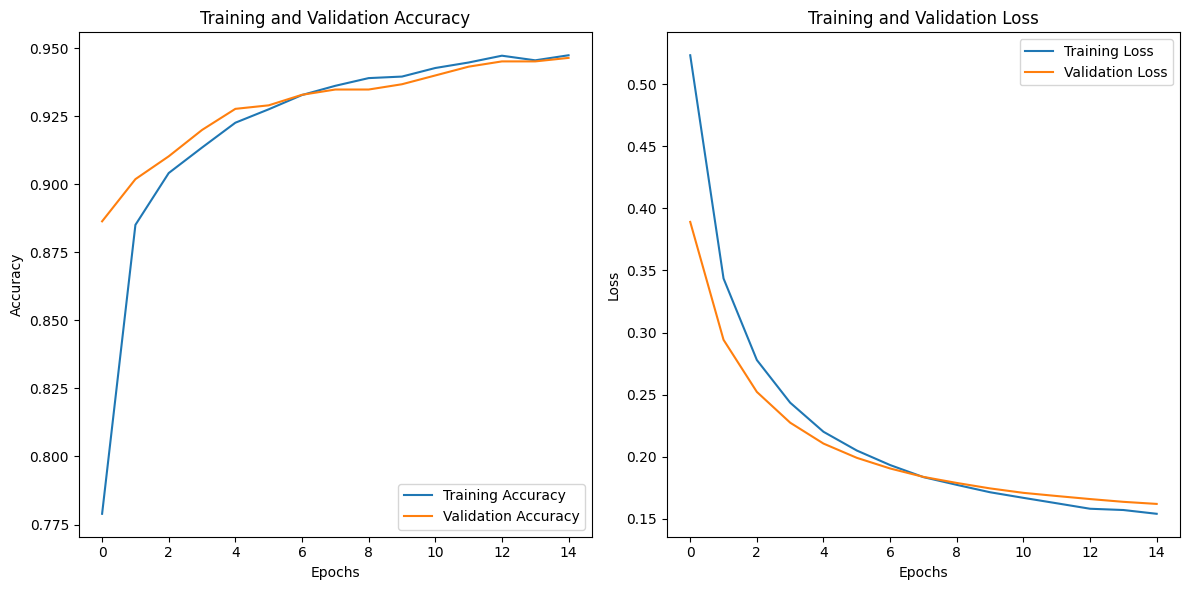

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history.get('val_accuracy', [])
loss = history.history['loss']
val_loss = history.history.get('val_loss', [])

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
if val_acc:
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
if val_loss:
    plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_val_pred_prob = model.predict([X_val_ids, X_val_masks])
y_val_pred = np.argmax(y_val_pred_prob, axis=1)
y_val_true = y_val_encoded.argmax(axis=1)
print(f"---Ch·ªâ s·ªë ƒë√°nh gi√° tr√™n t·∫≠p validation---")
accuracy = accuracy_score(y_val_true, y_val_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_val_true, y_val_pred, average='weighted')
recall = recall_score(y_val_true, y_val_pred, average='weighted')
f1 = f1_score(y_val_true, y_val_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

49/49 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 369ms/step
---Ch·ªâ s·ªë ƒë√°nh gi√° tr√™n t·∫≠p validation---
Accuracy: 0.9464
Precision: 0.9473
Recall: 0.9464
F1-score: 0.9465


In [ ]:
y_pred_prob = model.predict([X_test_ids, X_test_masks])
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = y_test_encoded.argmax(axis=1)
print(f"---Ch·ªâ s·ªë ƒë√°nh gi√° tr√™n t·∫≠p test---")
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

49/49 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 371ms/step
---Ch·ªâ s·ªë ƒë√°nh gi√° tr√™n t·∫≠p test---
Accuracy: 0.9445
Precision: 0.9448
Recall: 0.9445
F1-score: 0.9445


In [ ]:
model.save("sentiment_classification_model.keras", save_format='tf')

In [ ]:
model = load_model(
    "sentiment_classification_model.keras")

tf_model.h5:   0%|          | 0.00/740M [00:00<?, ?B/s]

Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at vinai/phobert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
def prepare_data(input_texts, tokenizer):
    tokenized_data = tokenizer(
        input_texts,
        max_length=256,
        truncation=True,
        padding='max_length',
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tf.cast(tokenized_data.input_ids, tf.int32),
        'attention_mask': tf.cast(tokenized_data.attention_mask, tf.int32)
    }

In [ ]:
input_texts = ["tr∆∞·ªùng h·ªçc r·ªông r√£i tho√°ng m√°t, l·ªõp h·ªçc ƒë·∫ßy ƒë·ªß c∆° s·ªü v·∫≠t ch·∫•t",
               "em y√™u tr∆∞·ªùng l·∫Øm lu√¥n üòä",
               "tr∆∞·ªùng h·ªçc ph√≠ ƒë√£ r·∫ª r·ªìi l·∫°i c√≤n c√≥ ch·∫•t l∆∞·ª£ng gi·∫£ng d·∫°y t·ªët",
               "M·∫°ng c·ªßa tr∆∞·ªùng ch√°n qu√°",
               "web tr∆∞·ªùng th√¨ ch·∫≠m nh∆∞ng thu h·ªçc ph√≠ th√¨ nhanh",
               "Tr∆∞·ªùng 10 ƒëi·ªÉm kh√¥ng c√≥ nh∆∞ng",
               "T·ªï ch·ª©c nhi·ªÅu ho·∫°t ƒë·ªông th√∫ v·ªã cho sinh vi√™n",
               "C·ª© ph·∫£i g·ªçi l√† kh√¥ng c√≥ ch·ªó ch√™",
	             "10 ƒëi·ªÉm tuy·ªát v·ªùi l·∫Øm",
	             "Th·∫ßy c√¥ b·∫°n b√® d·ªÖ th∆∞∆°ng d·ªÖ m·∫øn",
	             "ƒê∆∞·ªùng x√° to ƒë·∫πp r·ªông r√£i tho√°ng m√°t",
	             "T·ªï ƒë·ªôi clb 10 ƒëi·ªÉm",
	             "L·ªãch h·ªçc √≠t ngh·ªâ nhi·ªÅu",
	             "H·ªçc ph√≠ cao",
	             "v·ªá sinh b·∫©n",
	             "Ph√≤ng ƒë√†o t·∫°o kh√≥ khƒÉn v·ªõi sinh vi√™n"]
for i,text in enumerate(input_texts):
    print(f"comment {i+1} : {text}")

comment 1 : tr∆∞·ªùng h·ªçc r·ªông r√£i tho√°ng m√°t, l·ªõp h·ªçc ƒë·∫ßy ƒë·ªß c∆° s·ªü v·∫≠t ch·∫•t
comment 2 : em y√™u tr∆∞·ªùng l·∫Øm lu√¥n üòä
comment 3 : tr∆∞·ªùng h·ªçc ph√≠ ƒë√£ r·∫ª r·ªìi l·∫°i c√≤n c√≥ ch·∫•t l∆∞·ª£ng gi·∫£ng d·∫°y t·ªët
comment 4 : M·∫°ng c·ªßa tr∆∞·ªùng ch√°n qu√°
comment 5 : web tr∆∞·ªùng th√¨ ch·∫≠m nh∆∞ng thu h·ªçc ph√≠ th√¨ nhanh
comment 6 : Tr∆∞·ªùng 10 ƒëi·ªÉm kh√¥ng c√≥ nh∆∞ng
comment 7 : T·ªï ch·ª©c nhi·ªÅu ho·∫°t ƒë·ªông th√∫ v·ªã cho sinh vi√™n
comment 8 : C·ª© ph·∫£i g·ªçi l√† kh√¥ng c√≥ ch·ªó ch√™
comment 9 : 10 ƒëi·ªÉm tuy·ªát v·ªùi l·∫Øm
comment 10 : Th·∫ßy c√¥ b·∫°n b√® d·ªÖ th∆∞∆°ng d·ªÖ m·∫øn
comment 11 : ƒê∆∞·ªùng x√° to ƒë·∫πp r·ªông r√£i tho√°ng m√°t
comment 12 : T·ªï ƒë·ªôi clb 10 ƒëi·ªÉm
comment 13 : L·ªãch h·ªçc √≠t ngh·ªâ nhi·ªÅu
comment 14 : H·ªçc ph√≠ cao
comment 15 : v·ªá sinh b·∫©n
comment 16 : Ph√≤ng ƒë√†o t·∫°o kh√≥ khƒÉn v·ªõi sinh vi√™n


In [ ]:
import re
letters = set('a√°√†·∫£√£·∫°ƒÉ·∫Ø·∫±·∫≥·∫µ·∫∑√¢·∫•·∫ß·∫©·∫´·∫≠bcdƒëe√©√®·∫ª·∫Ω·∫π√™·∫ø·ªÅ·ªÉ·ªÖ·ªáfghi√≠√¨·ªâƒ©·ªãjklmno√≥√≤·ªè√µ·ªç√¥·ªë·ªì·ªï·ªó·ªô∆°·ªõ·ªù·ªü·ª°·ª£pqrstu√∫√π·ªß≈©·ª•∆∞·ª©·ª´·ª≠·ªØ·ª±vwxy√Ω·ª≥·ª∑·ªπ·ªµz0123456789. ')

def preprocess_text(text):
    cleaned_text = ''.join(letter.lower() for letter in text if letter.lower() in letters)
    cleaned_text = re.sub(r"\s+", " ", cleaned_text).strip()
    return cleaned_text

input_texts = [preprocess_text(text) for text in input_texts]
print(input_texts)

['tr∆∞·ªùng h·ªçc r·ªông r√£i tho√°ng m√°t l·ªõp h·ªçc ƒë·∫ßy ƒë·ªß c∆° s·ªü v·∫≠t ch·∫•t', 'em y√™u tr∆∞·ªùng l·∫Øm lu√¥n', 'tr∆∞·ªùng h·ªçc ph√≠ ƒë√£ r·∫ª r·ªìi l·∫°i c√≤n c√≥ ch·∫•t l∆∞·ª£ng gi·∫£ng d·∫°y t·ªët', 'm·∫°ng c·ªßa tr∆∞·ªùng ch√°n qu√°', 'web tr∆∞·ªùng th√¨ ch·∫≠m nh∆∞ng thu h·ªçc ph√≠ th√¨ nhanh', 'tr∆∞·ªùng 10 ƒëi·ªÉm kh√¥ng c√≥ nh∆∞ng', 't·ªï ch·ª©c nhi·ªÅu ho·∫°t ƒë·ªông th√∫ v·ªã cho sinh vi√™n', 'c·ª© ph·∫£i g·ªçi l√† kh√¥ng c√≥ ch·ªó ch√™', '10 ƒëi·ªÉm tuy·ªát v·ªùi l·∫Øm', 'th·∫ßy c√¥ b·∫°n b√® d·ªÖ th∆∞∆°ng d·ªÖ m·∫øn', 'ƒë∆∞·ªùng x√° to ƒë·∫πp r·ªông r√£i tho√°ng m√°t', 't·ªï ƒë·ªôi clb 10 ƒëi·ªÉm', 'l·ªãch h·ªçc √≠t ngh·ªâ nhi·ªÅu', 'h·ªçc ph√≠ cao', 'v·ªá sinh b·∫©n', 'ph√≤ng ƒë√†o t·∫°o kh√≥ khƒÉn v·ªõi sinh vi√™n']


In [ ]:
import py_vncorenlp
rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='/content/drive/MyDrive/Colab_Notebooks/deep_learning/vncorenlp')
segment_texts = [rdrsegmenter.word_segment(text) for text in input_texts]
text = [' '.join(segmented_text) for segmented_text in segment_texts]
text = '\n'.join(text)
print(text)

tr∆∞·ªùng_h·ªçc r·ªông_r√£i tho√°ng m√°t l·ªõp_h·ªçc ƒë·∫ßy_ƒë·ªß c∆°_s·ªü v·∫≠t_ch·∫•t
em y√™u tr∆∞·ªùng l·∫Øm lu√¥n
tr∆∞·ªùng_h·ªçc ph√≠ ƒë√£ r·∫ª r·ªìi l·∫°i c√≤n c√≥ ch·∫•t_l∆∞·ª£ng gi·∫£ng_d·∫°y t·ªët
m·∫°ng c·ªßa tr∆∞·ªùng ch√°n qu√°
web tr∆∞·ªùng th√¨ ch·∫≠m nh∆∞ng thu h·ªçc_ph√≠ th√¨ nhanh
tr∆∞·ªùng 10 ƒëi·ªÉm kh√¥ng c√≥ nh∆∞ng
t·ªï_ch·ª©c nhi·ªÅu ho·∫°t_ƒë·ªông th√∫_v·ªã cho sinh_vi√™n
c·ª© ph·∫£i g·ªçi l√† kh√¥ng c√≥ ch·ªó ch√™
10 ƒëi·ªÉm tuy·ªát_v·ªùi l·∫Øm
th·∫ßy_c√¥ b·∫°n_b√® d·ªÖ_th∆∞∆°ng d·ªÖ m·∫øn
ƒë∆∞·ªùng x√° to ƒë·∫πp r·ªông_r√£i tho√°ng m√°t
t·ªï ƒë·ªôi clb 10 ƒëi·ªÉm
l·ªãch h·ªçc √≠t ngh·ªâ nhi·ªÅu
h·ªçc_ph√≠ cao
v·ªá_sinh b·∫©n
ph√≤ng ƒë√†o_t·∫°o kh√≥_khƒÉn v·ªõi sinh_vi√™n


In [ ]:
tokenizer_input_text = prepare_data(input_texts, tokenizer)

In [ ]:
import time
start_time = time.time()
predictions = model.predict(tokenizer_input_text)
predict_label = np.argmax(predictions, axis = 1)
end_time = time.time()
print(f"Th·ªùi gian d·ª± ƒëo√°n: {end_time - start_time} gi√¢y")
for i in range(len(predictions)):
    print(f"comment {i+1}:")
    print(f"D·ª± ƒëo√°n: {predictions[i]}")
    print(f"Nh√£n d·ª± ƒëo√°n: {predict_label[i]}")

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 293ms/step
Th·ªùi gian d·ª± ƒëo√°n: 0.35538554191589355 gi√¢y
comment 1:
D·ª± ƒëo√°n: [0.4098243 0.5901756]
Nh√£n d·ª± ƒëo√°n: 1
comment 2:
D·ª± ƒëo√°n: [0.03547423 0.96452576]
Nh√£n d·ª± ƒëo√°n: 1
comment 3:
D·ª± ƒëo√°n: [0.14231016 0.85768986]
Nh√£n d·ª± ƒëo√°n: 1
comment 4:
D·ª± ƒëo√°n: [0.9765385  0.02346156]
Nh√£n d·ª± ƒëo√°n: 0
comment 5:
D·ª± ƒëo√°n: [0.9729897  0.02701028]
Nh√£n d·ª± ƒëo√°n: 0
comment 6:
D·ª± ƒëo√°n: [0.7900662 0.2099338]
Nh√£n d·ª± ƒëo√°n: 0
comment 7:
D·ª± ƒëo√°n: [0.66932476 0.33067518]
Nh√£n d·ª± ƒëo√°n: 0
comment 8:
D·ª± ƒëo√°n: [0.99773324 0.00226673]
Nh√£n d·ª± ƒëo√°n: 0
comment 9:
D·ª± ƒëo√°n: [0.4256231 0.5743769]
Nh√£n d·ª± ƒëo√°n: 1
comment 10:
D·ª± ƒëo√°n: [0.1714185 0.8285815]
Nh√£n d·ª± ƒëo√°n: 1
comment 11:
D·ª± ƒëo√°n: [0.2719242  0.72807586]
Nh√£n d·ª± ƒëo√°n: 1
comment 12:
D·ª± ƒëo√°n: [0.37621534 0.62378466]
Nh√£n d·ª± ƒëo√°n: 1
comment 13:
D·ª± ƒëo√°n: [0.8583759  0.14162408